# General tests

### compute pitch heatmap
The computer webcam img dimensions are (480, 640, 3) this being (y,x,rgb)


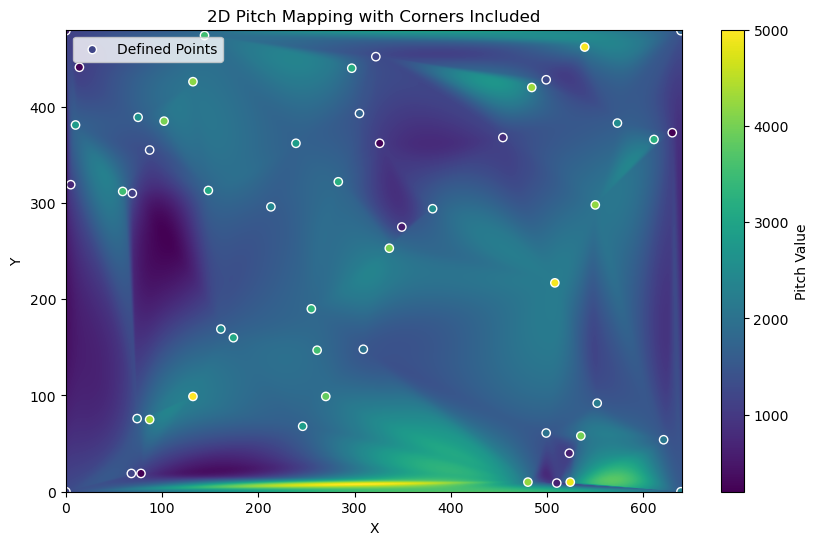

In [1]:
from aux_functions import build_pitch_grid
pitch_grid = build_pitch_grid(x_dim=640, y_dim=480, printGrid=True)


In [3]:
len(pitch_grid[0])

640

In [8]:
pitch_grid[29][364]

2743.9140352840004

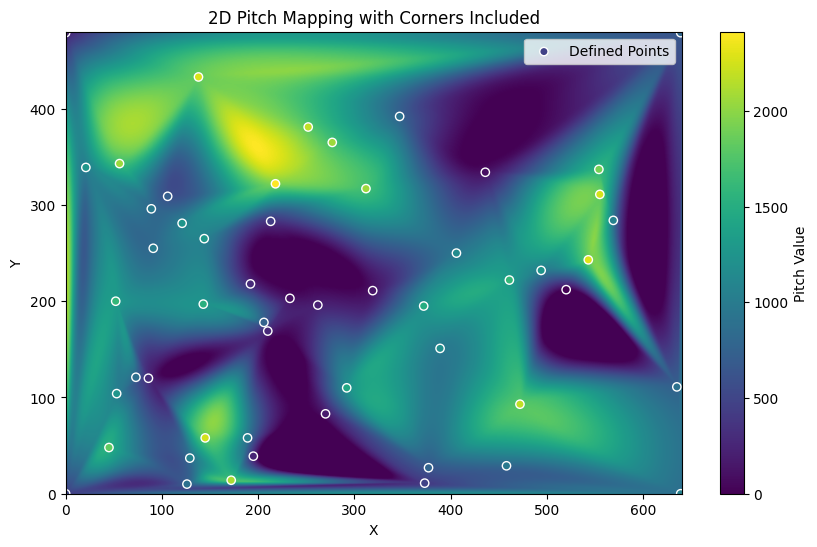

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Define grid dimensions
x_dim, y_dim = 640, 480

# Create a grid
x = np.arange(x_dim)
y = np.arange(y_dim)
xx, yy = np.meshgrid(x, y)

# Generate random points
num_points = 50  # Number of random points
random_x = np.random.randint(0, x_dim, size=num_points)
random_y = np.random.randint(0, y_dim, size=num_points)
random_points = np.array(list(zip(random_x, random_y)))

# Assign random pitch values to random points
random_pitch_values = np.random.uniform(20, 2000, size=num_points)  # MIDI or Hz

# Define corner points
corners = [(0, 0), (x_dim - 1, 0), (0, y_dim - 1), (x_dim - 1, y_dim - 1)]
corner_pitch_values = [440, 880, 220, 660]  # Assign specific pitch values to corners

# Combine random points and corner points
all_points = np.vstack((random_points, corners))
all_pitch_values = np.concatenate((random_pitch_values, corner_pitch_values))

# Interpolate across the grid
interpolated_pitch = griddata(
    all_points, all_pitch_values, (xx, yy), method='cubic', fill_value=np.nan
)
#interpolated_pitch = np.maximum(interpolated_pitch, 0)

# Visualization
plt.figure(figsize=(10, 6))
plt.imshow(interpolated_pitch, origin="lower", extent=(0, x_dim, 0, y_dim), cmap="viridis")
plt.colorbar(label="Pitch Value")
plt.scatter(*zip(*all_points), c=all_pitch_values, edgecolor="white", label="Defined Points")
plt.legend()
plt.title("2D Pitch Mapping with Corners Included")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [3]:
interpolated_pitch

array([[440.        , 451.7665193 , 463.50712667, ..., 906.35045633,
        893.20140688, 880.        ],
       [435.93976533, 447.54333791, 459.40550134, ..., 906.60993024,
        892.46608821, 878.72193978],
       [431.93695698, 442.65970265, 454.79762133, ..., 905.97841724,
        890.59923783, 877.48324431],
       ...,
       [233.89492904, 224.77063212, 215.8136287 , ..., 661.42728414,
        669.20342002, 676.39139568],
       [226.98229076, 218.26531981, 210.48130579, ..., 653.59794465,
        660.858754  , 668.22992386],
       [220.        , 211.63301299, 203.30222751, ..., 645.50993455,
        652.74858779, 660.        ]])

### Get matrix data

In [ ]:
import tensorflow as tf


In [12]:
data = [[[[0.63281184, 0.49849677, 0.37505552],
         [0.5466186 , 0.57336193, 0.37783977],
         [0.5535949 , 0.40703616, 0.6381436 ],
         [0.5997298 , 0.6592241 , 0.39844656],
         [0.5900171 , 0.29559553, 0.5476833 ],
         [0.87982106, 0.79328775, 0.33499193],
         [0.92426246, 0.24775316, 0.36714965],
         [0.97608685, 0.9277704 , 0.03660851],
         [0.95819116, 0.01209901, 0.00534357],
         [0.86827654, 0.84104306, 0.03206034],
         [0.7733701 , 0.33970886, 0.20269062],
         [0.991373  , 0.63783777, 0.00995263],
         [0.9920549 , 0.25207442, 0.02454685],
         [0.9840312 , 0.80950564, 0.03384359],
         [0.49617958, 0.25371417, 0.02541354],
         [0.9779317 , 0.94460666, 0.02493905],
         [0.8553577 , 0.30861178, 0.00438409]]]]
example = tf.constant(data, dtype=tf.float32)



In [ ]:
threshold = 0.2
valid_keypoints = tf.reshape(tf.gather(example[0][0], indices=tf.where(example[0][0][:,2]>threshold).numpy(), axis=0), [8,3])
max_x = tf.reduce_max(valid_keypoints[:,0])
max_y = tf.reduce_max(valid_keypoints[:,1])
min_x = tf.reduce_min(valid_keypoints[:,0])
min_y = tf.reduce_min(valid_keypoints[:,1])
print(f"({min_x}, {min_y}), ({max_x}, {max_y})")

bb_area = (max_x-min_x)*(max_y-min_y)
print(bb_area.numpy())

(0.5466185808181763, 0.24775315821170807), (0.9242624640464783, 0.7932877540588379)
0.2060178


In [27]:
tf.reduce_max(example[0][0][:,1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.94460666>

In [ ]:
max_x = max()

In [17]:
example[0][0][:,1]

<tf.Tensor: shape=(17,), dtype=float32, numpy=
array([0.49849677, 0.57336193, 0.40703616, 0.6592241 , 0.29559553,
       0.79328775, 0.24775316, 0.9277704 , 0.01209901, 0.84104306,
       0.33970886, 0.63783777, 0.25207442, 0.80950564, 0.25371417,
       0.94460666, 0.30861178], dtype=float32)>

In [16]:
example[0][0][:,0]

<tf.Tensor: shape=(17,), dtype=float32, numpy=
array([0.63281184, 0.5466186 , 0.5535949 , 0.5997298 , 0.5900171 ,
       0.87982106, 0.92426246, 0.97608685, 0.95819116, 0.86827654,
       0.7733701 , 0.991373  , 0.9920549 , 0.9840312 , 0.49617958,
       0.9779317 , 0.8553577 ], dtype=float32)>